# Chapter1 Review of Neural Network

## 1.1 Math and Python

## 1.2 Prediction of Neural Network

In [45]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(10, 2)
W1 = np.random.randn(2, 4)
b1 = np.random.randn(4)
W2 = np.random.randn(4, 3)
b2 = np.random.randn(3)

h = np.dot(x, W1) + b1
a = sigmoid(h)
s = np.dot(a, W2) + b2

print(s)

[[-0.53493193 -0.5247171  -2.64375572]
 [-0.54124544 -0.65299692 -2.89124709]
 [-0.72314367  0.09814948 -1.14513823]
 [-0.43875181 -0.21611169 -1.98119464]
 [-0.74755378  0.12793834 -1.18694412]
 [-0.65180853 -0.32071963 -2.22091246]
 [-0.54784024 -0.03119535 -1.68980056]
 [-0.45241895 -0.92681161 -3.30155571]
 [-0.38680553 -0.31997467 -2.12871497]
 [-0.73294214  0.05678831 -1.09844678]]


In [46]:
import numpy as np

class Sigmoid:
    def __init__(self):
        self.params = []

    def forward(self, x):
        return 1 / (1 + np.exp(-x))
    

class Affine:
    def __init__(self, W, b):
        self.params = [W, b]

    def forward(self, x):
        W, b = self.params
        out = np.dot(x, W) + b
        return out

In [47]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size

        W1 = np.random.randn(I, H)
        b1 = np.random.randn(H)
        W2 = np.random.randn(H, O)
        b2 = np.random.randn(O)

        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]

        self.params = []
        for layer in self.layers:
            self.params += layer.params

    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x


In [48]:
x = np.random.randn(10, 2)
model = TwoLayerNet(2, 4, 3) # input_size, hidden_size, output_size
s = model.predict(x)
print(s)

[[ 0.93473025  0.88704441 -0.25666098]
 [ 0.96015003  0.94379274 -0.28548061]
 [ 1.88906524  0.63530989  0.62296066]
 [ 1.43664924  0.80890514  0.15528256]
 [ 1.34902854  1.48188504 -0.02779317]
 [ 0.77678511 -0.51421052  0.19714892]
 [ 1.07506423  0.94075951 -0.1736324 ]
 [ 0.52016758  0.16103086 -0.18110686]
 [ 1.46418509  1.28603025  0.1105048 ]
 [ 1.41409152 -0.33042947  0.55322414]]


## 1.3 Laerning of Neural Network

### 1.3.1 Loss Function
![img](./fig/1_3_1.drawio.svg)

softmax function is shown as folloing:
$$
    \begin{align}
        y_k &= \frac{\exp(s_k)}{\sum_i^n \exp(s_i)} \\
        L &= -\sum_i^n t_k \log{y_k}
    \end{align}
$$


In [49]:
def softmax(x):
    if x.ndim == 2:
        x = x - x.max(axis=1, keepdims=True)
        x = np.exp(x)
        x /= x.sum(axis=1, keepdims=True)
    elif x.ndim == 1:
        x = x - np.max(x)
        x = np.exp(x) / np.sum(np.exp(x))

    return x

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size


class SoftmaxWithLoss:
    def __init__(self):
        self.params = []
        self.grads = []
        self.loss = None
        self.y = None
        self.t = None

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        return self.loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        if self.t.size == self.y.size:
            dx = (self.y - self.t) / batch_size
        else:
            dx = self.y
        return dx

### 1.3.2 Differentiation and Gradient


### 1.3.4 Calculation Graph

#### 1.3.4.2 Branch(Copy) Node

The result of Backpropation through a branch copy node is the sum of hte gradients from the branched outputs.
$$
    \frac{\partial L}{\partial x} + \frac{\partial L}{\partial x}
$$

#### 1.3.4.3 Repeat node

Same as branch copy node, the gradient of repeat node is the sum of gradients of the branched outputs.


In [50]:
import numpy as np
D, N = 8, 7
x = np.random.randn(1, D)
y = np.repeat(x, N, axis=0)

dy = np.random.randn(N, D)
dx = np.sum(dy, axis=0, keepdims=True)

print(x)
print(y)
print(dy.shape)
print(dx.shape)



[[ 0.79389976  0.59031989 -1.58753561  0.42620888 -1.48364564  0.5816316
   1.20478988  1.55470631]]
[[ 0.79389976  0.59031989 -1.58753561  0.42620888 -1.48364564  0.5816316
   1.20478988  1.55470631]
 [ 0.79389976  0.59031989 -1.58753561  0.42620888 -1.48364564  0.5816316
   1.20478988  1.55470631]
 [ 0.79389976  0.59031989 -1.58753561  0.42620888 -1.48364564  0.5816316
   1.20478988  1.55470631]
 [ 0.79389976  0.59031989 -1.58753561  0.42620888 -1.48364564  0.5816316
   1.20478988  1.55470631]
 [ 0.79389976  0.59031989 -1.58753561  0.42620888 -1.48364564  0.5816316
   1.20478988  1.55470631]
 [ 0.79389976  0.59031989 -1.58753561  0.42620888 -1.48364564  0.5816316
   1.20478988  1.55470631]
 [ 0.79389976  0.59031989 -1.58753561  0.42620888 -1.48364564  0.5816316
   1.20478988  1.55470631]]
(7, 8)
(1, 8)


#### 1.3.4.4 Merge(Sum) node

Opposite from Repear node, the gradient of merge node is the gradient of the copy of the branched outputs.

In [51]:
import numpy as np
D, N = 8, 7
x = np.random.randn(N, D)
y = np.sum(x, axis=1, keepdims=True)

dy = np.random.randn(1,D)
dx = np.repeat(dy, N, axis=0)

print(x)
print(y)
print(dy)
print(dx)


[[-1.84467901 -0.28695917  1.08400252 -2.17214025 -0.59791657 -0.57222508
  -2.21545916  0.78432267]
 [ 1.35399921  2.56837235  0.07537694 -0.35323465 -0.47861506  0.18815854
  -0.2689488  -0.48756359]
 [ 1.6181345  -0.34424232  1.62328774 -1.6176928   0.69989709 -0.04652368
   1.41647566  0.1995681 ]
 [ 0.57847891  0.71851823 -0.37809476  1.58398319 -0.54843083  1.1413213
   1.05562476 -1.21377218]
 [ 0.92685767  0.36080894  0.0962304  -0.56552267 -0.51106047 -0.74264461
  -1.85129322  0.86021383]
 [-0.26032041 -0.17451359  0.36571645  2.39960893  0.93104823  1.15669177
  -0.82893899 -0.46203852]
 [-1.59976242 -1.24165053  0.96353511 -0.11943888 -0.42100039 -1.83637674
  -1.88719614 -0.02327671]]
[[-5.82105405]
 [ 2.59754493]
 [ 3.54890428]
 [ 2.93762863]
 [-1.42641014]
 [ 3.12725387]
 [-6.1651667 ]]
[[-0.56862859  2.20103688  0.94698541 -1.62401008  0.42276279 -0.80764748
   0.99661846 -1.16044912]]
[[-0.56862859  2.20103688  0.94698541 -1.62401008  0.42276279 -0.80764748
   0.996618

#### 1.3.4.5 Matrix Multiplication node

The gradient of matrix multiplication node is the product of the gradients of the branched outputs and the transposed input.
$$
    \frac{\partial L}{\partial x_i} = \sum_j \frac{\partial L}{\partial y_j} \frac{\partial y_j}{\partial x} = \sum_j \frac{\partial L}{\partial y_j} W_{ij}
$$



In [52]:
class MatMul:
    def __init__(self, W):
        self.params = [W]
        self.grads = [np.zeros_like(W)]
        self.x = None

    def forward(self, x):
        W = self.params
        out = np.dot(x, W)
        self.x = x
        return out

    def backward(self, dout):
        W = self.params
        dx = np.dot(dout, W.T)
        dW = np.dot(self.x.T, dout)
        self.grads[0][...] = dW
        return dx
    

### 1.3.5 Derivation of Gradients and Implementation of Backpropagation

#### 1.3.5.1 Sigmoid Layer

$$
    \frac{\partial L}{\partial x} = y(1-y)
$$

In [53]:
class Sigmoid:
    def __init__(self):
        self.params, self.grads = [], []
        self.out = None

    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out
        return out

    def backward(self, dout):
        dx = dout * (1 - self.out) * self.out
        return dx



#### 1.3.5.2 Affine Layer

Predict result of Affine Luyer is
$$X(N, D) * W(D, H) + b(H) = Y(N, H)$$

Backpropagation is calculated as
$$
    \frac{\partial L}{\partial x} (N,D) = \frac{\partial L}{\partial y} (N,H) * \frac{\partial y}{\partial x} (D,H).T = \frac{\partial L}{\partial y} (N,H) * W.T
$$

In [54]:
# Affine Class

class Affine:
    def __init__(self, w, b):
        self.params = [w, b]
        self.grads = [np.zeros_like(w), np.zeros_like(b)]
        self.x = None

    def forward(self, x):
        w, b = self.params
        out = np.dot(x, w) + b
        self.x = x
        return out
    
    def backward(self, dout):
        w, b = self.params
        dx = np.dot(dout, w.T)
        dw = np.dot(self.x.T, dout)
        db = np.sum(dout, axis=0)

        self.grads[0][...] = dw
        self.grads[1][...] = db
        return dx

#### 1.3.5.3 Softmax with Loss Layer



### 1.3.6 Update weights with Gradient Descent

Weights are updated as

$$
    W_{ij} = W_{ij} - \eta \frac{\partial L}{\partial W_{ij}}
$$

In [55]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr

    def update(self, params, grads):
        for i in range(len(params)):
            params[i] -= self.lr * grads[i]


## 1.4 Solve a Problem with Neural Network

### 1.4.1 spiral dataset


(300, 2)
(300, 3)


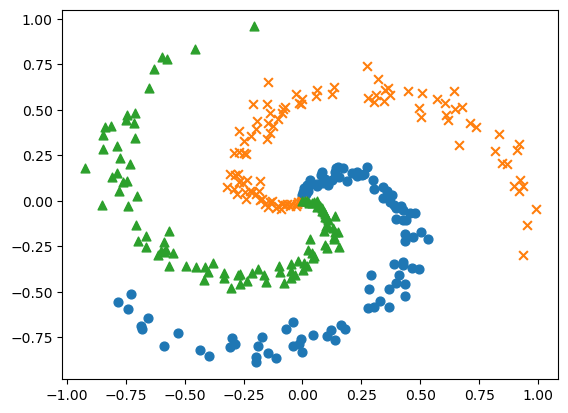

In [56]:
import sys
sys.path.append("../.org/deep-learning-from-scratch-2/")
from dataset import spiral
import numpy as np
import matplotlib.pyplot as plt
import importlib
## needed to modify spiral.py np.int to np.int32


importlib.reload(spiral)

x, t = spiral.load_data()
print(x.shape)
print(t.shape)

# Plot x datas with result label T

N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])

### 1.4.2 implementation of Neural Network

In [57]:
# 1.4.2 implementation of Neural Network

import sys
sys.path.append("../.org/deep-learning-from-scratch-2/")
import numpy as np
from common.layers import Affine, Sigmoid, SoftmaxWithLoss

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size

        # initialize weight and bias
        W1 = 0.01 * np.random.randn(I, H)
        b1 = np.random.randn(H)
        W2 = 0.01 * np.random.randn(H, O)
        b2 = np.random.randn(O)

        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]
        self.loss_layer = SoftmaxWithLoss()

        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads

    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x
    
    def forward(self, x, t):
        y = self.predict(x)
        loss = self.loss_layer.forward(y, t)
        return loss
    
    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout

### 1.4.3 Training

| epoch 1 | iter 10 / 10 | loss 1.20
| epoch 2 | iter 10 / 10 | loss 1.17
| epoch 3 | iter 10 / 10 | loss 1.14
| epoch 4 | iter 10 / 10 | loss 1.11
| epoch 5 | iter 10 / 10 | loss 1.14
| epoch 6 | iter 10 / 10 | loss 1.12
| epoch 7 | iter 10 / 10 | loss 1.09
| epoch 8 | iter 10 / 10 | loss 1.05
| epoch 9 | iter 10 / 10 | loss 1.07
| epoch 10 | iter 10 / 10 | loss 1.08
| epoch 11 | iter 10 / 10 | loss 1.03
| epoch 12 | iter 10 / 10 | loss 1.00
| epoch 13 | iter 10 / 10 | loss 0.97
| epoch 14 | iter 10 / 10 | loss 0.95
| epoch 15 | iter 10 / 10 | loss 0.98
| epoch 16 | iter 10 / 10 | loss 0.96
| epoch 17 | iter 10 / 10 | loss 0.92
| epoch 18 | iter 10 / 10 | loss 0.91
| epoch 19 | iter 10 / 10 | loss 0.93
| epoch 20 | iter 10 / 10 | loss 0.91
| epoch 21 | iter 10 / 10 | loss 0.91
| epoch 22 | iter 10 / 10 | loss 0.86
| epoch 23 | iter 10 / 10 | loss 0.87
| epoch 24 | iter 10 / 10 | loss 0.86
| epoch 25 | iter 10 / 10 | loss 0.84
| epoch 26 | iter 10 / 10 | loss 0.80
| epoch 27 | iter 10 

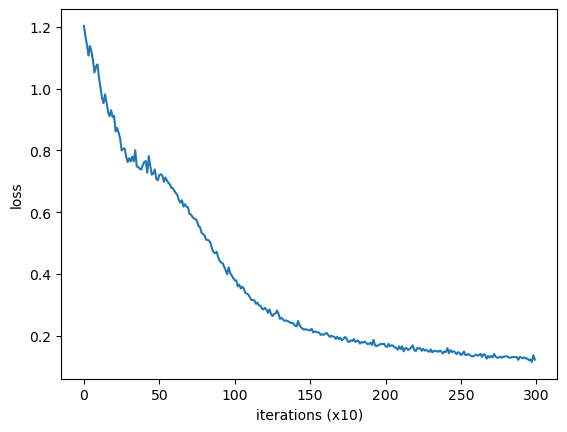

In [64]:
import sys
sys.path.append("../.org/deep-learning-from-scratch-2/")
import numpy as np
from common.optimizer import SGD
from dataset import spiral
import matplotlib.pyplot as plt

# hyperparameters
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

# load data
x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

# initialize
data_size = len(x)
max_iters = data_size // batch_size
total_loss = 0
loss_count = 0
loss_list = []

for epoch in range(max_epoch):
    idx = np.random.permutation(data_size)
    x = x[idx]
    t = t[idx]

    for iters in range(max_iters):
        batch_x = x[iters*batch_size:(iters+1)*batch_size]
        batch_t = t[iters*batch_size:(iters+1)*batch_size]

        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)

        total_loss += loss
        loss_count += 1

        if (iters+1) % 10 == 0:
            avg_loss = total_loss / loss_count

            print('| epoch %d | iter %d / %d | loss %.2f'
                  % (epoch + 1, iters + 1, max_iters, avg_loss))

            loss_list.append(avg_loss)
            total_loss, loss_count = 0, 0

plt.plot(np.arange(len(loss_list)), loss_list, label='train')
plt.xlabel('iterations (x10)')
plt.ylabel('loss')
plt.show()


-1.0223506996640548 1.0889954428950932 -0.9886726617070215 1.0580883414647684
(2047, 2112) (2047, 2112)
(4323264, 2)


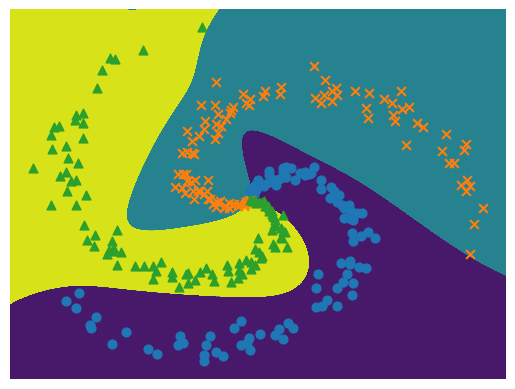

In [65]:
x, y = spiral.load_data()

# 境界領域のプロット
h = 0.001
x_min, x_max = x[:, 0].min() - .1, x[:, 0].max() + .1
y_min, y_max = x[:, 1].min() - .1, x[:, 1].max() + .1

print(x_min, x_max, y_min, y_max)

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# print(xx.shape, yy.shape)

X = np.c_[xx.ravel(), yy.ravel()]

# print(X.shape)

score = model.predict(X)
predict_cls = np.argmax(score, axis=1)
Z = predict_cls.reshape(xx.shape)
plt.contourf(xx, yy, Z)
plt.axis('off')

N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])

### 1.4.4 Tranier Class


| epoch 1 |  iter 1 / 10 | time 0[s] | loss 1.41
| epoch 2 |  iter 1 / 10 | time 0[s] | loss 1.18
| epoch 3 |  iter 1 / 10 | time 0[s] | loss 1.15
| epoch 4 |  iter 1 / 10 | time 0[s] | loss 1.15
| epoch 5 |  iter 1 / 10 | time 0[s] | loss 1.11
| epoch 6 |  iter 1 / 10 | time 0[s] | loss 1.14
| epoch 7 |  iter 1 / 10 | time 0[s] | loss 1.11
| epoch 8 |  iter 1 / 10 | time 0[s] | loss 1.10
| epoch 9 |  iter 1 / 10 | time 0[s] | loss 1.06
| epoch 10 |  iter 1 / 10 | time 0[s] | loss 1.09
| epoch 11 |  iter 1 / 10 | time 0[s] | loss 1.05
| epoch 12 |  iter 1 / 10 | time 0[s] | loss 1.04
| epoch 13 |  iter 1 / 10 | time 0[s] | loss 0.99
| epoch 14 |  iter 1 / 10 | time 0[s] | loss 0.97
| epoch 15 |  iter 1 / 10 | time 0[s] | loss 0.95
| epoch 16 |  iter 1 / 10 | time 0[s] | loss 0.97
| epoch 17 |  iter 1 / 10 | time 0[s] | loss 0.96
| epoch 18 |  iter 1 / 10 | time 0[s] | loss 0.93
| epoch 19 |  iter 1 / 10 | time 0[s] | loss 0.92
| epoch 20 |  iter 1 / 10 | time 0[s] | loss 0.91
| epoch 2

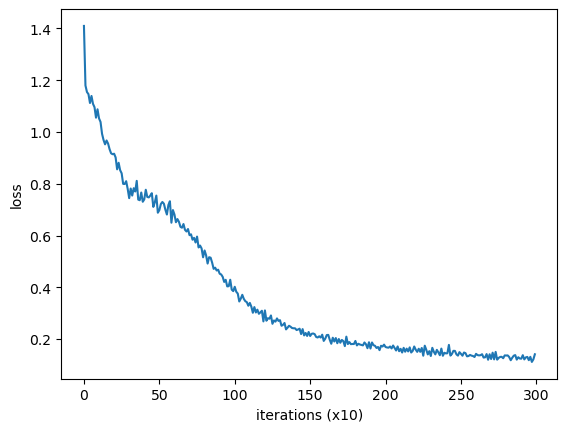

In [76]:
import sys
sys.path.append("../.org/deep-learning-from-scratch-2/")
import numpy as np
from common.trainer import Trainer
from common.optimizer import SGD
from dataset import spiral

max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

triner = Trainer(model, optimizer)
triner.fit(x, t, max_epoch, batch_size, eval_interval=10)
triner.plot()


## 1.5 Accelaration of Computation

### 1.5.1 acurency of computation

Numpy use float64 by default.
To reduce memory usage and accelerate computation, use float32.

To use float32, use `dtype=np.float32` like 
`b = np.random.randn(2, 3).astype(np.float32)`

### 1.5.2 GPU

CuPy is a GPU-accelerated version of Numpy.
It have the same interface with Numpy.

To use CuPy, use `import cupy as np`
